In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

from mdn import SimpleNN, MDN, train

### Data Generatation

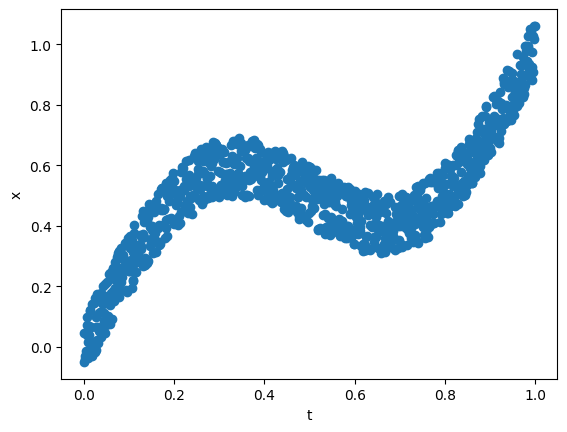

In [2]:
# x = t + 0.3 sin(2 * pi * t) + e
n = 1000
t = torch.arange(0, 1, 1/n)
e = 0.2 * torch.rand(n) - 0.1  # ~ U(-0,1, 0.1)

x = t + 0.3 * torch.sin(2 * torch.pi * t) + e

plt.scatter(t, x)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

### Simple Neural Netork

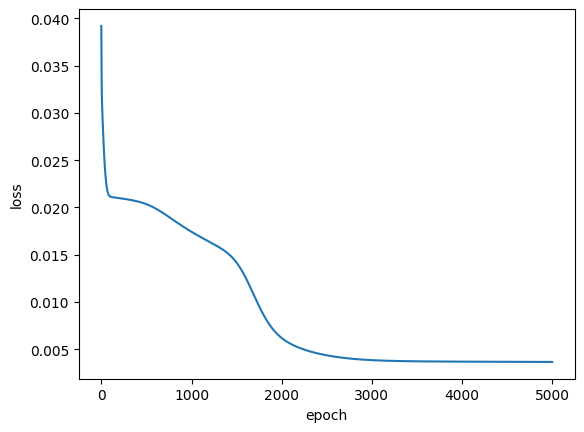

In [3]:
net = SimpleNN()
net.train()

optimizer = optim.Adam(net.parameters(), lr=0.001)
batch_size = 256
num_epochs = 5000

net, hist_loss = train(
    net,
    num_epochs,
    batch_size,
    optimizer,
    inp=t,
    target=x,
)

plt.plot(hist_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

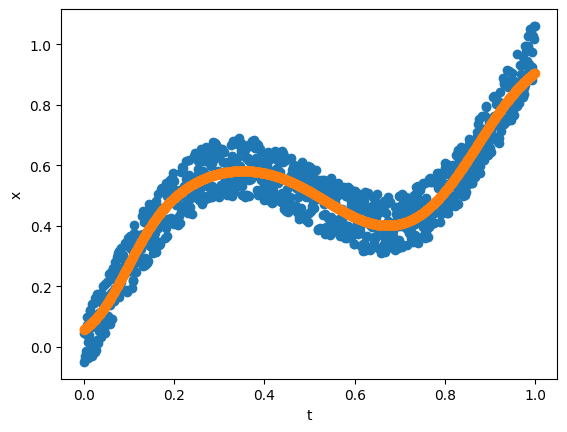

In [4]:
out = net.predict(t.view(-1, 1)).detach().numpy()

plt.scatter(t, x)
plt.scatter(t, out)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

#### The Inverse Problem

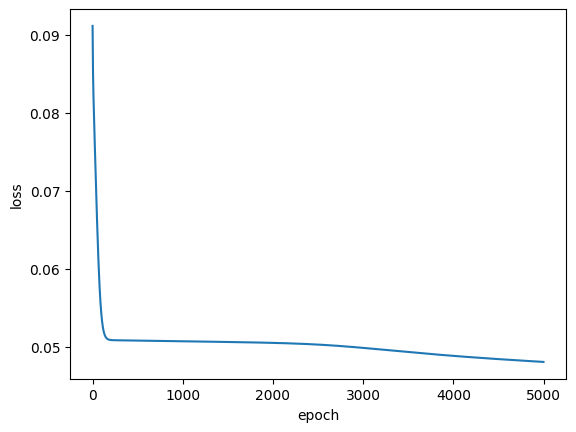

In [5]:
inv_net = SimpleNN()
inv_net.train()

optimizer = optim.Adam(inv_net.parameters(), lr=0.001)
batch_size = 256
num_epochs = 5000

inv_net, hist_loss = train(
    inv_net,
    num_epochs,
    batch_size,
    optimizer,
    inp=x,    # input and output are swapped
    target=t,
)

plt.plot(hist_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

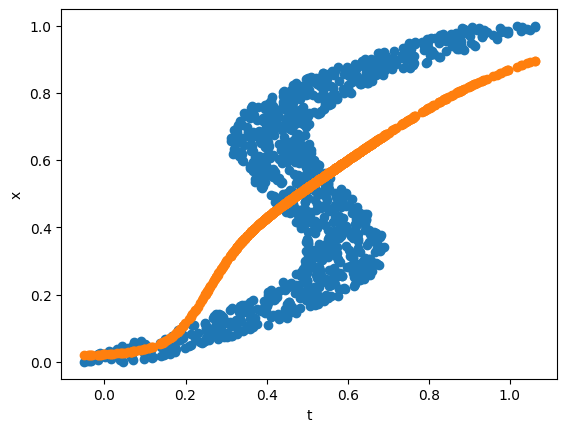

In [6]:
out = inv_net.predict(x.view(-1, 1)).detach().numpy()

plt.scatter(x, t)
plt.scatter(x, out)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

### Mixed Density Network

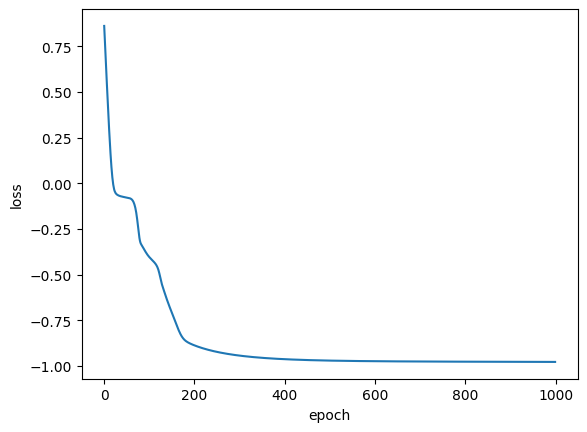

In [7]:
mdn = MDN()
optimizer = optim.Adam(mdn.parameters(), lr=0.001)
batch_size = 256
hist_loss = []
num_epochs = 1000

mdn, hist_loss = train(
    mdn,
    num_epochs,
    batch_size,
    optimizer,
    inp=x,    # input and output are swapped
    target=t,
)

plt.plot(hist_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

#### Prediction with Mean of Gaussian with max mixture coefficient

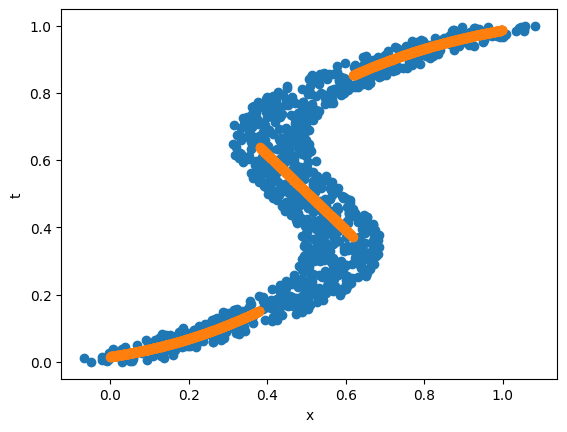

In [8]:
n = 1000

t = torch.arange(0, 1, 1/n)
e = 0.2 * torch.rand(n) - 0.1
x = t + 0.3 * torch.sin(2 * torch.pi * t) + e
plt.scatter(x, t)

x = torch.arange(0, 1, 1/n).view(-1, 1)
t = []
n = mdn.num_gaussians

for i in range(len(x)):
    out = mdn.predict(x[i].view(-1, 1)).view(-1).detach().numpy()
    which = np.argmax(out[:n])
    mu = out[which + 2 * n]
    t.append(mu)

plt.scatter(x, t)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

#### Sampling from Predicted Mixture of Gaussian

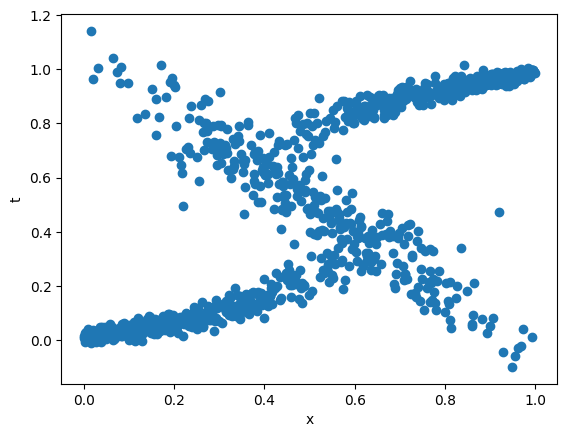

In [9]:
n = 1000
x = torch.arange(0, 1, 1/n).view(-1, 1)
t = []
n = mdn.num_gaussians

for i in range(len(x)):
    out = mdn.predict(x[i].view(-1, 1)).view(-1).detach().numpy()
    which = np.random.choice(range(n), p=out[:n])
    mu = out[which + 2 * n]
    sigma = out[which + n]
    sample  = np.random.randn() * sigma + mu
    t.append(sample)

plt.scatter(x, t)
plt.xlabel("x")
plt.ylabel("t")
plt.show()